# 파이썬 머신러닝 완벽 가이드
캐글 예제로 배우는 머신러닝

## Chapter 01. 파이썬 기반의 머신러닝과 생태계 이해

### 넘파이(Numpy)
-파이썬에서 선형대수 기반의 프로그램을 쉽게 만들 수 있도록 지원하는 대표적인 패키지.    
-루프를 사용하지 않고 대량 데이터의 배열 연산을 가능하게 하므로 빠른 배열 연산 속도를 보장.    
-기존 C/C++ 기반의 타 프로그램과 데이터를 주고받거나 API를 호출해 쉽게 통합할 수 있는 기능 제공.

In [1]:
import numpy as np

* 넘파이의 기반 데이터 타입은 ndarray. 이를 이용해 다차원 배열을 쉽게 생성하고 다양한 연산 수행 가능

In [4]:
array1 = np.array([1,2,3])
print('array1 type :', type(array1))
print('array1 array 형태 :', array1.shape) #tuple 형태로 반환 : 1차원

array2 = np.array([[1,2,3],[2,3,4]])
print('array2 type :' ,type(array2))
print('array2 array 형태 :',array2.shape) #2차원

array3 = np.array([[1,2,3]])
print('array3 type :',type(array3))
print('array3 array 형태 :',array3.shape) #2차원

array1 type : <class 'numpy.ndarray'>
array1 array 형태 : (3,)
array2 type : <class 'numpy.ndarray'>
array2 array 형태 : (2, 3)
array3 type : <class 'numpy.ndarray'>
array3 array 형태 : (1, 3)


In [5]:
print('array:{:0}차원, array2 : {:1}차원, array3 : {:2}차원'.format(array1.ndim, array2.ndim, array3.ndim))

array:1차원, array2 : 2차원, array3 :  2차원


__numpy 데이터 타입__    
ndarray내의 데이터 타입은 그 연산의 특성상 같은 데이터 타입만 가능. 즉, 한 개의 ndarray 객체에 int와 float가 함께 있을 수 없음. dtype으로 속성 확인 가능.

In [6]:
list1 = [1,2,3]
print(type(list1))
array1 = np.array(list1)
print(type(array1))
print(array1, array1.dtype)

<class 'list'>
<class 'numpy.ndarray'>
[1 2 3] int32


In [7]:
list2 = [1,2,'test']
array2 = np.array(list2)
print(array2, array2.dtype) #모두 문자형으로 변경

list3 = [1,2,3.0]
array3 = np.array(list3)
print(array3, array3.dtype) #모두 float형으로 변경

['1' '2' 'test'] <U11
[1. 2. 3.] float64


In [8]:
array_int = np.array([1,2,3])
array_float = array_int.astype('float64')
print(array_float, array_float.dtype)

array_int1 = array_float.astype('int32')
print(array_int1,array_int1.dtype)

array_float1 = np.array([1.1,2.1,3.1])
array_int2 = array_float1.astype('int32') #float을 int로 변경하여 소수점 모두 사라짐
print(array_int2,array_int2.dtype) 

[1. 2. 3.] float64
[1 2 3] int32
[1 2 3] int32


__ndarray 편리하게 생성(arange, zeros, ones)__    
테스트용으로 데이터를 만들거나 대규모의 데이터를 일괄적으로 초기화해야 할 경우에 사용

In [9]:
sequence_array = np.arange(10)
print(sequence_array)
print(sequence_array.dtype, sequence_array.shape)

[0 1 2 3 4 5 6 7 8 9]
int32 (10,)


In [10]:
zero_array = np.zeros((3,2),dtype='int32')
print(zero_array)
print(zero_array.dtype, zero_array.shape)

one_array = np.ones((3,2))
print(one_array)
print(one_array.dtype, one_array.shape)

[[0 0]
 [0 0]
 [0 0]]
int32 (3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
float64 (3, 2)


__ndarray의 차원과 크기를 변경하는 reshape()__

In [12]:
array1 = np.arange(10)
print('array1:\n',array1)

array2 = array1.reshape(2,5)
print('array2 :\n',array2)

array3 = array1.reshape(5,2)
print('array3 :\n',array3)

array1:
 [0 1 2 3 4 5 6 7 8 9]
array2 :
 [[0 1 2 3 4]
 [5 6 7 8 9]]
array3 :
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [13]:
array1.reshape(4,3) #지정된 사이즈로 변경이 불가능하면 오류 발생

ValueError: cannot reshape array of size 10 into shape (4,3)

In [14]:
array1 = np.arange(10)
print(array1)
array2 = array1.reshape(-1,5) # 2차원으로 변환하되, 고전된 5개의 칼럼에 맞는 로우를 자동으로 새롭게 생성해 변환하라
print('array2 shape:',array2.shape)
array3 = array1.reshape(5,-1)
print('array3 shape:',array3.shape)

#array1.reshape(-1,4) 의 경우 변경할 수 없어 에러 발생

[0 1 2 3 4 5 6 7 8 9]
array2 shape: (2, 5)
array3 shape: (5, 2)


In [15]:
array1 = np.arange(8)
array3d = array1.reshape((2,2,2))
print('array3d:\n',array3d.tolist())

#3차원 ndarray를 2차원 ndarray로 변환
array5 = array3d.reshape(-1,1)
print('array5:\n',array5.tolist())
print('array5:\n',array5.shape)

#1차원 ndarray를 2차원 ndarray로 변환
array6 = array1.reshape(-1,1)
print('array6:\n',array6.tolist())
print('array6:\n',array6.shape)

array3d:
 [[[0, 1], [2, 3]], [[4, 5], [6, 7]]]
array5:
 [[0], [1], [2], [3], [4], [5], [6], [7]]
array5:
 (8, 1)
array6:
 [[0], [1], [2], [3], [4], [5], [6], [7]]
array6:
 (8, 1)


__넘파이의 ndarray의 데이터 세트 선택 - 인덱싱(Indexing)__
1. 특정한 데이터만 추출 : 원하는 위치의 인덱스 값을 지정하면 해당 위치의 데이터 반환
2. 슬라이싱 : 연속된 인덱스상의 ndarray를 추출하는 방식.
3. 팬시 인덱싱 : 일정한 인덱싱 집합을 리스트 또는 ndarray 형태로 지정해 해당 위치에 있는 데이터의 ndarray를 반환
4. 불린 인덱싱 : 특정 조건에 해당하는지 여부인 True/False값 인덱싱 집합을 기반으로 True에 해당하는 인덱스 위치에 있는 데이터를 반환

In [17]:
#단일 값 추출
#1부터 9까지의 1차원 ndarray 생성
array1 = np.arange(start=1, stop=10)
print('array1:',array1)
#index는 0부터 시작하므로 array1[2]는 3번째 index 위치의 데이터값을 의미
value = array1[2]
print('value: ',value)
print(type(value))

print('맨 뒤의 값:',array1[-1],'맨 뒤에서 두 번째 값:',array1[-2])

array1: [1 2 3 4 5 6 7 8 9]
value:  3
<class 'numpy.int32'>
맨 뒤의 값: 9 맨 뒤에서 두 번째 값: 8


In [18]:
#데이터값 수정
array1[0] = 9
array1[8] = 0
print('array1 :',array1)

array1 : [9 2 3 4 5 6 7 8 0]


In [19]:
array1d = np.arange(start=1, stop=10)
array2d = array1d.reshape(3,3)
print(array2d)

print('(row=0, col=0) index 가리키는 값:',array2d[0,0]) #axis0=0,axis1=0
print('(row=0, col=1) index 가리키는 값:',array2d[0,1])
print('(row=1, col=0) index 가리키는 값:',array2d[1,0])
print('(row=2, col=2) index 가리키는 값:',array2d[2,2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(row=0, col=0) index 가리키는 값: 1
(row=0, col=1) index 가리키는 값: 2
(row=1, col=0) index 가리키는 값: 4
(row=2, col=2) index 가리키는 값: 9


In [20]:
#슬라이싱
array1d = np.arange(start=1,stop=10)
array2d = array1d.reshape(3,3)
print('array2d:\n',array2d)

print('array2d[0:2,0:2]\n',array2d[0:2,0:2])
print('array2d[1:3,0:3]\n',array2d[1:3,0:3])
print('array2d[1:3,:]\n',array2d[1:3,:])
print('array2d[:,:]\n',array2d[:,:])
print('array2d[:2,1:]\n',array2d[:2,1:])
print('array2d[:2,0]\n',array2d[:2,0])

array2d:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[0:2,0:2]
 [[1 2]
 [4 5]]
array2d[1:3,0:3]
 [[4 5 6]
 [7 8 9]]
array2d[1:3,:]
 [[4 5 6]
 [7 8 9]]
array2d[:,:]
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[:2,1:]
 [[2 3]
 [5 6]]
array2d[:2,0]
 [1 4]


In [21]:
#2차원에서 뒤에 오는 인덱스를 없애면 1차원 ndarray 반환
print(array2d[0])
print(array2d[1])
print('array2d[0] shape:',array2d[0].shape, 'array2d[1] shape:',array2d[1].shape)

[1 2 3]
[4 5 6]
array2d[0] shape: (3,) array2d[1] shape: (3,)


In [22]:
#팬시 인덱싱
array1d = np.arange(start=1,stop=10)
array2d = array1d.reshape(3,3)

array3 = array2d[[0,1],2] #(0,2) (1,2)
print('array2d[[0,1],2]=>',array3.tolist())

array4 = array2d[[0,1],0:2] #((0,0),(0,1)),((1,0),(1,1))
print('array2d[[0,1],0:2]]=>',array4.tolist())

array5 = array2d[[0,1]]
print('array2d[[0,1]]=>',array5.tolist())

array2d[[0,1],2]=> [3, 6]
array2d[[0,1],0:2]]=> [[1, 2], [4, 5]]
array2d[[0,1]]=> [[1, 2, 3], [4, 5, 6]]


In [24]:
#불린 인덱싱
array1d = np.arange(start=1, stop=10)
# [] 안에 array1d > 5 Boolean indexing 적용
array3 = array1d[array1d > 5]
print('array1d>5 불린 인덱싱 결과 값 :',array3)

#직접 인덱스 집합을 만들어 대입한 것과 동일
indexes = np.array([5,6,7,8])
print('일반 인덱스로 필터링 결과:',array1d[indexes])

array1d>5 불린 인덱싱 결과 값 : [6 7 8 9]
일반 인덱스로 필터링 결과: [6 7 8 9]


__행렬의 정렬 - sort() / argsort()__

In [25]:
#np.sort() : 원 행렬은 그대로 유지한 채 원 행렬의 정렬된 행렬을 반환
#ndarray.sort() : 원 행렬 자체를 정렬한 형태로 변환, 반환 값은 None

org_array = np.array([3,1,9,5])
print('원본 행렬:',org_array)
#np.sort로 정렬
sort_array1 = np.sort(org_array)
print('np.sort() 호출 후 반환된 정렬 행렬:',sort_array1)
print('np.sort() 호출 후 원본 행렬:',org_array)

#ndarray.sort로 정렬
sort_array2 = org_array.sort()
print('ndarray.sort() 호출 후 반환된 정렬 행렬:',sort_array2)
print('ndarray.sort() 호출 후 원본 행렬:',org_array)

원본 행렬: [3 1 9 5]
np.sort() 호출 후 반환된 정렬 행렬: [1 3 5 9]
np.sort() 호출 후 원본 행렬: [3 1 9 5]
ndarray.sort() 호출 후 반환된 정렬 행렬: None
ndarray.sort() 호출 후 원본 행렬: [1 3 5 9]


In [26]:
#내림차순 정렬
sort_array1_desc = np.sort(org_array)[::-1]
print('내림차순으로 정렬:',sort_array1_desc)

내림차순으로 정렬: [9 5 3 1]


In [27]:
array2d = np.array([[8,12],[7,1]])

sort_array2d_axis0 = np.sort(array2d,axis=0)
print('로우 방향으로 정렬:\n',sort_array2d_axis0)

sort_array2d_axis1 = np.sort(array2d,axis=1)
print('로우 방향으로 정렬:\n',sort_array2d_axis1)

로우 방향으로 정렬:
 [[ 7  1]
 [ 8 12]]
로우 방향으로 정렬:
 [[ 8 12]
 [ 1  7]]


In [30]:
# 정렬된 행렬의 인덱스 반환
org_array = np.array([3,1,9,5])
sort_indices = np.argsort(org_array)
print(type(sort_indices))
print('행렬 정렬 시 원본 행렬의 인덱스 :',sort_indices)

#내림차순 정렬시 원본 행렬 인덱스 반환
sort_indices_desc = np.argsort(org_array)[::-1]
print('행렬 정렬 시 원본 행렬의 인덱스 :',sort_indices_desc)

<class 'numpy.ndarray'>
행렬 정렬 시 원본 행렬의 인덱스 : [1 0 3 2]
행렬 정렬 시 원본 행렬의 인덱스 : [2 3 0 1]


In [31]:
#argsort를 사용하여 팬시인덱스로 적용해 추출할 수 있음
name_array = np.array(['John','Mike','Sarah','Kate','Samuel'])
score_array = np.array([78,95,84,98,88])

sort_indices_asc = np.argsort(score_array)
print('성적 오름차순 정렬 시 score_array의 인덱스 :',sort_indices_asc)
print('성적 오름차순으로 name_array의 이름 출력 :',name_array[sort_indices_asc])

성적 오름차순 정렬 시 score_array의 인덱스 : [0 2 4 1 3]
성적 오름차순으로 name_array의 이름 출력 : ['John' 'Sarah' 'Samuel' 'Mike' 'Kate']


__선형대수 연산 - 행렬 내적과 전치 행렬 구하기__

In [32]:
#행렬 내적(행렬 곱)
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8],[9,10],[11,12]])
dot_product = np.dot(A,B)
print('행렬 내적 결과:\n',dot_product) #(2x3)*(3x2) = (2x2)

행렬 내적 결과:
 [[ 58  64]
 [139 154]]


In [33]:
#전치행렬
A = np.array([[1,2],[3,4]])
transpose_mat = np.transpose(A)
print('A의 전치 행렬:\n',transpose_mat)

A의 전치 행렬:
 [[1 3]
 [2 4]]


### 판다스

In [34]:
import pandas as pd

In [35]:
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
print('DataFrame 크기:',titanic_df.shape)
titanic_df.info()

DataFrame 크기: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
titanic_df.describe() 
#describe는 오직 숫자형 칼럼의 분포도만 조사

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
print(titanic_df['Pclass'].value_counts())
#해당 칼럼값의 유형과 건수 확인 가능

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [39]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass)) #series 객체 반환
titanic_pclass.head()

<class 'pandas.core.series.Series'>


0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [40]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts) #모든 인덱스는 고유성이 보장되어야 함.

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [41]:
print('titanic_df 데이터 건수:',titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
#value_counts의 default는 dropna=True이므로 value_counts(dropna=True)와 동일
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수: 891
기본 설정인 dropna=True로 value_counts()
S    644
C    168
Q     77
Name: Embarked, dtype: int64
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


__넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환__

In [43]:
import numpy as np

col_name1=['col1']
list1=[1,2,3]
array1 = np.array(list1)
print('array1 shape:',array1.shape)

#리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n',df_list1)

#넘파이 ndarray를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1,columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n',df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [44]:
#3개의 칼럼명 필요
col_name2 = ['col1','col2','col3']

#2행 3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환
list2 = [[1,2,3],[11,12,13]]
array2 = np.array(list2)
print('array2 shape:',array2.shape)
df_list2 = pd.DataFrame(list2,columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n',df_list2)
df_array2 = pd.DataFrame(array2,columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n',df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [46]:
# Key는 문자열 칼럼명으로 매핑, Value는 리스트형(또는 ndarray) 칼럼 데이터로 매핑
dict = {'col':[1,11],'col2':[2,22],'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n',df_dict)

딕셔너리로 만든 DataFrame:
    col  col2  col3
0    1     2     3
1   11    22    33


__DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환__

In [49]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:',type(array3),'df_dict.values shape:',array3.shape)
print(array3)

#DataFrmae을 리스트로 변환
list3 = df_dict.values.tolist()
print('\n df_dict.values.tolist() 타입:',type(list3))
print(list3)

#DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:',type(dict3))
print(dict3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]

 df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


__DataFrame의 칼럼 데이터 세트 생성과 수정__

In [57]:
#새로운 칼럼 생성
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [58]:
# 기존 칼럼 Series를 이용해 새로운 칼럼 생성
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [59]:
# 컬럼 값에 일괄 +100 으로 업데이트
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


__DataFrame 데이터 삭제__    
axis 0 : 로우 방향    
axis 1 : 컬럼 방향

In [60]:
# age_0 칼럼 삭제
titanic_drop_df = titanic_df.drop('Age_0',axis=1)

#inplace = True로 삭제
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'],axis=1,inplace=True)
print('inplace=True로 drop 후 반환된 값',drop_result)
titanic_df.head(3)

inplace=True로 drop 후 반환된 값 None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [61]:
# index 0,1,2 로우 삭제
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2],axis=0,inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


__Index 객체__

In [2]:
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
#Index 객체 추출
indexes = titanic_df.index
print(indexes)
#Index 객체를 실제 값 array로 변환
print('Index 객체 array값:\n',indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [3]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [5]:
indexes[0] = 5
#한 번 만들어진 dataframe 및 series의 index 객체는 함부로 변경할 수 없음

TypeError: Index does not support mutable operations

In [6]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series +3:\n',(series_fair+3).head(3))

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series +3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


In [7]:
#reset_index 메서드를 수행하면 새롭게 인덱스를 연속 숫자 형으로 할당. 기존 인덱스는 index라는 새로운 컬럼명으로 추가
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))
new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

#reset_index(drop=True)로 설정시 기존 인덱스는 새로운 칼럼으로 추가되지 않고 삭제됨.

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


__데이터 셀렉션 및 필터링__

In [9]:
# 단일 컬럼 데이터 추출
print('[]안에 숫자 index는 KeyError 오류 발생:\n',titanic_df[0])

KeyError: 0

In [11]:
#슬라이싱 추출
titanic_df[0:2] # 좋지않음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
#불린 인덱싱 표현
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [13]:
# DataFrame iloc 연산자
data = {'Name':['Chulmin','Eunkyung','Jinwoong','Soobeom'],
       'Year':[2011,2016,2015,2015],
       'Gender':['Male','Female','Male','Male']}
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [14]:
data_df.iloc[0,0]

'Chulmin'

In [15]:
# 아래 코드는 오류를 발생시킴. (인덱스 값이나 컬럼명을 입력하면 오류 발생)
data_df.iloc[0,'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [16]:
print('\n 맨 마지막 컬럼 데이터 [:,-1]\n',data_df.iloc[:,-1])
print('\n 맨 마지막 컬럼을 제외한 모든 데이터 [:,:-1]\n',data_df.iloc[:,:-1])


 맨 마지막 컬럼 데이터 [:,-1]
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 컬럼을 제외한 모든 데이터 [:,:-1]
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


In [17]:
# DataFrame loc[] 연산자
data_df.loc['one','Name']

'Chulmin'

In [18]:
# 다음 코드는 오류를 발생시킴
data_df.loc[0,'Name'] # 인덱스 값을 숫자로 입력해서 오류 발생

KeyError: 0

In [19]:
print('위치기반 iloc slicing\n',data_df.iloc[0:1,0],'\n')
print('명칭기반 loc slicing\n',data_df.loc['one':'two','Name'])

위치기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


In [20]:
#불린 인덱싱
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [21]:
# 개별조건을 변수에 할당하고 이들 변수를 결합해서 불린 인덱싱을 수행할 수도 있음
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[cond1&cond2&cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### 정렬, Aggregation 함수, GroupBy 적용

In [22]:
# Name 컬럼으로 오름차순 정렬해 반환
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [23]:
# Pclass, Name 컬럼으로 내림차순 정렬해 반환
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'],ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


In [24]:
# Aggregation 함수 적용
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [25]:
#groupby 적용
type(titanic_df.groupby(by='Pclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [26]:
#groupby 후 aggregation 함수를 호출하면 모든 컬럼에 해당 aggregation 함수 적용
titanic_df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [27]:
# 여러개의 함수명 사용
titanic_df.groupby('Pclass')['Age'].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [29]:
# 여러개의 컬럼에 서로 다른 함수를 호출할 경우 딕셔너리 사용
agg_format = {'Age':'max','SibSp':'sum','Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


### 결손 데이터 처리

In [30]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [32]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공

In [36]:
def get_square(a):
    return a**2
print('3의 제곱은 :',get_square(3))

lambda_square = lambda x : x**2
print('3의 제곱은 :',lambda_square(3))

3의 제곱은 : 9
3의 제곱은 : 9


In [37]:
a = [1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [38]:
# name의 글자 수 컬럼 생성
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [39]:
# 나이가 15세 미만 child, 그렇지 않으면 adult
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x :'Child' if x <= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [40]:
# 나이가 15세 미만 child, 15~60세 사이는 adult, 61세 이상은 Elderly
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x <=60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [41]:
#세분화된 분류가 필요할 경우 함수 생성
def get_category(age):
    cat = ''
    if age <=5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


## Chapter 02. 싸이킷런으로 시작하는 머신러닝

In [42]:
import sklearn
print(sklearn.__version__)

1.1.1


### 붓꽃 품종 예측

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [48]:
import pandas as pd

#붓꽃 데이터 세트 로딩
iris = load_iris()

#iris.data는 iris 데이터 세트에서 피처만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:',iris_label)
print('iris target명:',iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 dataframe으로 변환함
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11) 
#rando_state는 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위한 난수값

In [52]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11) #random_state 역시 예제 코드로 동일한 결과를 예측하기 위함.
#학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [55]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


### 사이킷런 기반 프레임워크 익히기

In [56]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))

keys =iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)

<class 'sklearn.utils._bunch.Bunch'>
붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [59]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:',type(iris_data.target_names))
print(' target_names의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:',type(iris_data.data))
print(' data의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:',type(iris_data.target))
print(' target의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [

### model selection 모듈

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data,train_label)

#학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [63]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121) 

In [64]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


### 교차 검증
__K 폴드 교차 검증__    
K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법.

In [65]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [66]:
# kfold의 split을 이용한 학습과 검증 반복
n_iter = 0

# kfold 객체의 split을 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index, in kfold.split(features):
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.
         format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n##평균 검증 정확도:',np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도: 0.9


__Stratified K 폴드__    
불균형한 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식 (원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 셋을 분배)

In [67]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [68]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts())

# 교차 검증시마다 학습과 검증 레이블이 모두 다르므로 검증 예측 정확도가 0이 나오는 경우도 있음.

## 교차 검증 : 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [69]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검정: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts())

## 교차 검정: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검정: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검정: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [71]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features,label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    #반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

#교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:',np.round(cv_accuracy,4))
print('## 평균 검증 정확도:',np.round(np.mean(cv_accuracy),4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


__cross_val_score()__

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

#성능 지표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [73]:
cross_validate(dt_clf, data, label, cv=3)

{'fit_time': array([0.00199175, 0.        , 0.00099778]),
 'score_time': array([0.        , 0.00099611, 0.        ]),
 'test_score': array([0.98, 0.94, 0.98])}

__GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에__

In [74]:
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [75]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [76]:
#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [78]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [80]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


### 데이터 전처리
__데이터 인코딩__

In [81]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [82]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [83]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안됨. 몇몇 ML 알고리즘에는 숫자 값의 크고 작음에 대한 특성에 따라 예측 성능이 떨어지기 때문에 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 됨. 트리 계열의 ML 알고리즘은 별 문제가 없음.    
이러한 문제점을 해결하기 위해 원-핫 인코딩이 있음.

In [86]:
#원-핫 인코딩(One-Hot Encoding) : 여러 개의 속성 중 단 한 개의 속성만 1로 표시
'''입력값으로 2차원 데이터가 필요.
변환된 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray()로 밀집 행렬(Dense Matrix)로 변환해야함.'''
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(9, 6)


In [87]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


__피처 스케일링과 정규화__    
* __표준화__ : 데이터의 피처 각각이 평균 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환 (SVM, 선형회귀, 로지스틱 회귀 시 사용)
* __정규화__ : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것)

In [89]:
# StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [90]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 셋 변환. fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [91]:
#MinMaxSacler (0과 1사이의 값, 음수값이 있으면 -1에서 1의 값으로 변환)
from sklearn.preprocessing import MinMaxScaler

# MinMaxSacler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 셋 변환. fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 셋이 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


__학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점__

In [92]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지의 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [95]:
# MinMaxSacler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [96]:
# MinMaxSacler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [97]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :',np.round(train_scaled.reshape(-1),2))

#test_array에 scale 변환을 할 떄에는 fit을 호출하지 않고 transform만으로 변환해야함.
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('c:/data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# Null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 0


In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
#cabin의 경우 선실 등급을 나타내는 첫 번째 알파벳이 중요해보임. 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

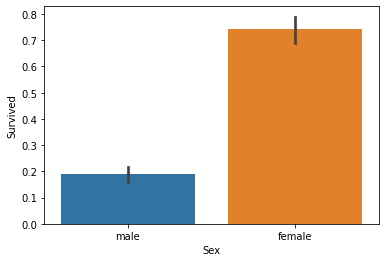

In [7]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

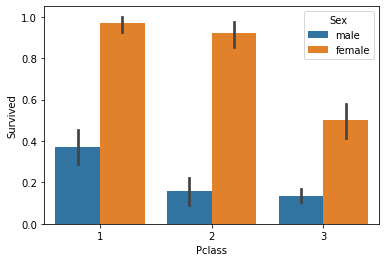

In [8]:
# 객실 등급별 성별에 따른 생존 확률
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df);

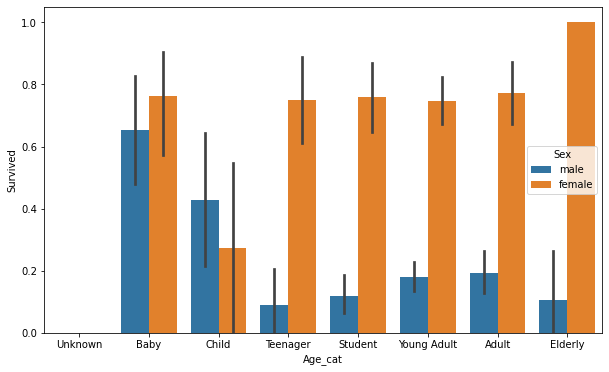

In [9]:
# Age에 따른 생존 확률. 범위별로 분류해 카테고리 값을 할당
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [11]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [14]:
# 피처를 가공한 내역을 정리하고 이를 함수로 만들어 재사용 가능하게 만듦.

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [16]:
# 별도의 테스트 데이터 셋 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 __결정 트리, 랜덤 포레스트, 로지스틱 회귀__ 를 이용해 타이타닉 생존자 예측

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # 작은 데이터 셋에서 이진분류는 liblinear가 성능이 약간 더 좋음

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8547


아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않아 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음.

In [25]:
# KFold 교차 검증으로 결정트리모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [27]:
# cross_val_score을 통한 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [29]:
# GridSearchCV로 최적 하이퍼 파라미터를 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GirdSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GirdSearchCV 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)

GirdSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [30]:
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 셋에서의 DecisionTreeClassifier 정확도  : {0:.4f}'.format(accuracy))

테스트 셋에서의 DecisionTreeClassifier 정확도  : 0.8715


## Chapter 03. 평가
### 정확도(Accuracy)

In [33]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [38]:
# MyDummyClassifier를 통한 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [39]:
# MNIST 데이터 셋을 이용하여 7인 것만 True, 아닌 것은 False인 이진 분류로 변경
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고, 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [41]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict의 결과를 모두 0으로 반환함에도 정확도는 90%임. 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 셋에서는 성능 수치로 사용돼서는 안됨.

### 오차 행렬
* TN : 예측값 Negative(0) / 실제값 Negative(0)
* FP : 예측값 Positive(1) / 실제값 Negative(0) : 제1종오류
* FN : 예측값 Negative(0) / 실제값 Positive(1) : 제2종오류
* TP : 예측값 Positive(1) / 실제값 Positive(1)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [43]:
# 정확도 = (TN+TP)/전체 데이터 수
(405+0)/450

0.9

### 정밀도와 재현율
* __정밀도(Precision)__ = TP / (FP + TP) : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (양성 예측도)    
실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(스팸메일)
* __재현율(Recall)__ = TP / (FN + TP) : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (민감도, TPR)    
실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(암판단, 금융사기적발)

In [44]:
# 오차행렬, 정확도, 정밀도, 재현율 등의 평가를 한꺼번에 호출하는 함수 생성
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy,precision,recall))

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


__정밀도/재현율 트레이드오프__    
분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우, 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음. 하지만 둘은 상호 보완적인 평가 지표로 어느 한쪽을 강제로 높이면 다른 하나는 떨어짐. 이를 정밀도/재현율의 트레이드오프라고 부름.

In [46]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n',pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3]) #임곗값은 0.5임

pred_proba() 결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429646 0.13570354]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429646 0.13570354 0.        ]]


In [49]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [50]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [51]:
# 임곗값을 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197


In [57]:
# 임곗값을 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표 조사
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


임곗값이 0.45인 경우 디폴트 0.5인 경우와 비교하여 정확도는 비슷하고, 정밀도는 약간 떨어졌으나 재현율이 올랐음. 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야겠다면 0.45가 가장 적당함.

In [100]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)

# 반환된 임곗값 배열 로우가 165건이므로 샘플로 10건만 추출하되, 임곗값을 17 step으로 추출
thr_index = np.arange(0, thresholds.shape[0],17)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))
      
# 17 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임곗값별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (165,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  17  34  51  68  85 102 119 136 153]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.15 0.21 0.29 0.44 0.62 0.74 0.9 ]
샘플 임곗값별 정밀도: [0.341 0.377 0.431 0.466 0.545 0.659 0.754 0.896 0.967 1.   ]
샘플 임곗값별 재현율: [1.    1.    0.967 0.902 0.902 0.885 0.803 0.705 0.475 0.213]


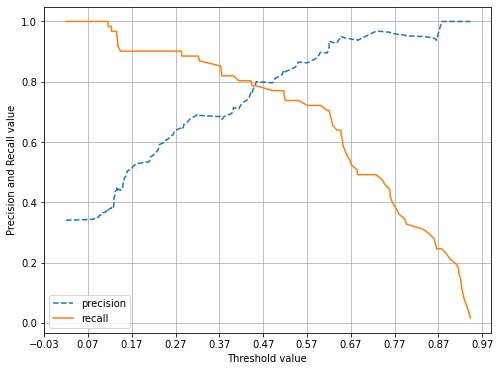

In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

### F1 스코어
정밀도와 재현율을 결합한 지표로, 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [106]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [107]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)
# 임곗값이 0.6인 경우 재현율이 크게 감소함.


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197, F1:0.7576

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869, F1:0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705, F1:0.7966

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377, F1:0.7965

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213, F1:0.8000


### ROC 곡선과 AUC
* __ROC 곡선__ : FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate, 민감도, 재현율)이 어떻게 변하는지를 나타내는 곡선. 
    - 민감도(TPR) : 실제값 Positive가 정확히 예측돼야 하는 수준
    - 특이성(TNR) : 실제값 Negative가 정확히 예측돼야 하는 수준
ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것. FPR을 0부터 1까지 변경하며 TPR의 변화 값을 구함. (임곗값을 변경)

In [108]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:',thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐. TPR은 조금 더 가파르게 커짐.

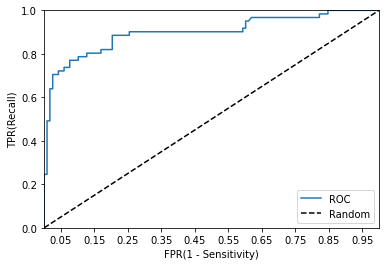

In [109]:
def roc_curve_plot(y_test,pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

__AUC__ : ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치.    
AUC수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건. 보통의 분류는 0.5 이상의 AUC값을 가짐.

In [110]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [111]:
def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1, roc_auc))